
# Normalizing flows

## Real non-volume preserving flows (RealNVP)

## Objective

The objective is to implement a particular kind of flow model (we use RealNVP flow) in this example and observe its inferencing and generating capability. In this notebook, we map a simple 2-dimensional 'toy' distribution from **sklearn.datasets** to a 2-dimensional Gaussian distribution. 

## Normalizing flows

A normalizing flow is a DNN-based model and defined by a bijective mapping $f:\mathcal{X} \to \mathcal{Z}$ where $\mathcal{X}, \mathcal{Z} \in \mathbb{R}^{D}$ and denote the data space and latent space respectively. As a result of bijectivity, there also exists an inverse mapping $g:\mathcal{Z} \to \mathcal{X}$, i.e. $g = f^{-1}$. For a data point $\mathbf{x} \in \mathcal{X}$, the value of $p\left(\mathbf{x}\right)$ can be computed exactly  using the **change of variable** formula:

$\begin{equation}
\begin{aligned}
\log p\left(\mathbf{x}\right) &= \log p\left(\mathbf{z}\right) + \log \Bigg\vert\text{det}\left(\frac{\partial\mathbf{z}}{\partial\mathbf{x}} \right) \Bigg\vert \\
&= \log p\left(f\left(\mathbf{x}\right)\right) + \log \Bigg\vert\text{det}\left(\frac{\partial f\left(\mathbf{x}\right)}{\partial\mathbf{x}} \right)\Bigg\vert. \\
\end{aligned}
\label{eqn:chgofvar}
\end{equation}$

## The RealNVP model

We define a class for a RealNVP model. Basically this consists of defining the *affine coupling layer* of the RealNVP model, the *normalizing* function and the *generating* function. 

- The function that maps the input from the data space $\mathcal{X}$ to the latent space $\mathcal{Z}$ is usually referred to as the normalizing function. This is represented by $f\left(\mathbf{x}\right)$, s.t. $f : \mathcal{X} \to \mathcal{Z}$. The inverse function is called the generating function which maps the points from latent space $\mathcal{Z}$ back to the data space $\mathcal{X}$. This is represented by $g\left(\mathbf{z}\right)$ s.t. $g : \mathcal{Z} \to \mathcal{X}$.

- Also, defining this model requires to define *masks* for each affine coupling layer that would enable alternate switching or mixing of values. The implementation is based on the masked implementation in the original paper [1]

## Implementation of the Generating  and Normalizing functions for RealNVP

Every input feature is split into two parts $\mathbf{x} = \left[\mathbf{x}_1 \hspace{0.1 in} \mathbf{x}_2\right]^{T}$, with $\mathbf{x}_{1} \in \mathrm{R}^{d}$, $\mathbf{x}_{2} \in \mathrm{R}^{D - d}$. 

**Generating function** $(\mathbf{g} : \mathcal{Z} \to \mathcal{X})$ (latent space to data space) is defined as:

  $\mathbf{x}_{1} = \mathbf{z}_{1}$ 

  $\mathbf{x}_{2} = \mathbf{z}_{2} \odot \exp\left(\mathbf{s} \left(\mathbf{z}_{1}\right) \right) + \mathbf{t} \left(\mathbf{z}_{1} \right)$

Such a combination of the two transformations as defined above for $\mathbf{x}_{1}, \mathbf{x}_{2}$ is referred to as a **coupling layer**

**Normalizing function** $(\mathbf{f} : \mathcal{X} \to \mathcal{Z})$ (from data space to latent space, which is used in Jacobian computation during training) is defined as:

$\mathbf{z}_{1} = \mathbf{x}_{1}$

$\mathbf{z}_{2} = \left(\mathbf{x}_{2} - \mathbf{t} \left(\mathbf{x}_{1} \right) \right) \odot \exp\left(- \mathbf{s} \left(\mathbf{x}_{1} \right) \right)$

(where $\mathrm{X, Z} \in \mathbb{R}^{D}$, $\mathbf{x}_{1} \in \mathbb{R}^{d}$, $\mathbf{x}_{2} \in \mathbb{R}^{D - d}$, $\mathbf{s}: \mathbb{R}^{d} \to \mathbb{R}^{D-d}$, $\mathbf{t}: \mathbb{R}^{d} \to \mathbb{R}^{D-d}$, with $\mathbf{s}, \mathbf{t}$ being Shallow feed-forward Neural Nets that differ only in the last layer, which is a $\texttt{tanh}$ for $\mathbf{s}$ and $\texttt{identity}$ for $\mathbf{t}$ [1]).

**Using masks for implementing coupling layers:**
Both the transforms for $\mathbf{x}_{1}, \mathbf{x}_{2}$, can be combined into a single transformation that can be implemented using *masks* on the input. If we consider a binary mask like $\mathbf{b}$ that is say 1 for the first half of the input vector (i.e. of dimension $\mathrm{R}^{d}$) and zero for the other half dimension, then the complete transformation for $\mathbf{x}$ can be implemented as in [1]:

$\mathbf{x} = \mathbf{b} \odot \mathbf{z} + (1 - \mathbf{b}) \odot \left(\mathbf{x} \odot \exp \left( \mathbf{s} \left( \mathbf{b} \odot \mathbf{z} \right) \right) + \mathbf{t} \left( \mathbf{b} \odot \mathbf{z} \right) \right)$


**Computing the Jacobian determinant:**

This requires computing the determinant of the matrix $J = \frac{\partial \mathbf{z}}{\partial \mathbf{x}^{T}} = \begin{bmatrix} \mathrm{I}_{d} & \mathbf{0} \\ \frac{\partial \mathbf{z}_{d+1:D}}{\partial \mathbf{x}_{1:d}^{T}} & diag(\exp\left(-\mathbf{s}(\mathbf{x}_{1:d})\right)) \end{bmatrix}$ (Try to check this yourself using the above equations for the *normalizing* function)


# Tasks

The implementation consists of the following steps:

- Importing and loading the dataset
- Implementation of the Normalizing flow model
- Building the training loop for the `make_moons` dataset
- Exploring the inferencing and generating capabilities of the model for the `make_moons` dataset

Coding exercises are provided in the cells, where it can be required to fill in the blank portions or correct errors in the code. Specific instructions are provided in code cells or comments above the exercises. 

# Additional tasks

- Try to see if you can also train the model for inferencing and generating samples for the 'circles' dataset. You can make a copy of this notebook and train the model again or do it in the same notebook after noting down your results. *NOTE:* You need to play around with the parameters to get the best settings for the circles dataset.

## References

1. Dinh, Laurent, Jascha Sohl-Dickstein, and Samy Bengio. "Density estimation using real nvp." arXiv preprint arXiv:1605.08803 (2016). [click here](https://arxiv.org/pdf/1605.08803)

2. Kobyzev, Ivan, Simon Prince, and Marcus Brubaker. "Normalizing flows: An introduction and review of current methods." IEEE Transactions on Pattern Analysis and Machine Intelligence (2020). [click here](https://ieeexplore.ieee.org/iel7/34/4359286/09089305.pdf?casa_token=wKeavLxNFx8AAAAA:Xy0NDcyrqCTkG8xB4-0CfjCTaCfBrCe145fki2RyrInP4CZw79kZh53BfADPO1PageiNzUr4)

*NOTE:* This tutorial was adapted from:  https://github.com/senya-ashukha/real-nvp-pytorch


### Connecting to GPU:

- This notebook uitilizes the computational power of GPUs for faster execution. In case your computers have GPU support or access to GPU servers, you do not need to execute this notebook on Google Colab.

Otherwise, if you choose to use Google Colab the following steps follow:

- In order to facilitate the use of GPUs in Google Colab (owing to large no. of parameters in the models), firstly you can connect to the GPU by going to *Edit* ---> *Notebook settings* ---> Select *Hardware accelerator* as *GPU*. The notebook will reconnect once and will now be connected to the GPU given by Google Colab. If the setting is not changed, then the codes will be executed using CPU.

  You can check the GPU status by executing the command in the following cell to check available GPU memory and stats.

  ```
  !/opt/bin/nvidia-smi # '!' is used to access command line
  ```


In [1]:
!/opt/bin/nvidia-smi # '!' is used to access command line

/bin/bash: /opt/bin/nvidia-smi: No such file or directory


Import the necessary libraries


In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import torch
from torch import nn
from torch.autograd import Variable
from torch import distributions
from torch.nn.parameter import Parameter
import matplotlib
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import IPython
from IPython.display import HTML
import sklearn
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
import copy

In [3]:
# Print out the version of the packages
print("pytorch=={}".format(torch.__version__))
print("scikit-learn=={}".format(sklearn.__version__))
print("numpy=={}".format(np.__version__))
print("matplotlib=={}".format(matplotlib.__version__))
print("IPython=={}".format(IPython.__version__))

pytorch==1.6.0
scikit-learn==1.0.1
numpy==1.20.3
matplotlib==3.4.3
IPython==7.29.0


## Importing and loading the dataset


We will be using two model datasets known as `make_moons()` and `make_circles()` from scikit learn (`sklearn.datasets`). These are commonly used for examining clustering and classification algorithms, and especially the `make_moons` dataset has been used in a couple of papers on Normalizing flows as an example of representation.

For details regarding each of these datasets:

- `make_moons()`: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

- `make_circles()`: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html


Task: Complete the code for loading the datasets and obtaining the training dataloader

In [65]:
# As a first example we will be trying to use the 'make_moons', 'make_circles' datasets 
# from sklearn

n_samples = 1000 # No. of training samples
n_test_samples = 400 # No. of testing samples

# Initialising and obtaining the training dataset 
moons_training_dataset = datasets.make_moons(n_samples, noise=.05)[0].astype(np.float32) # ... # Load the dataset make_moons() from sklearn with number of points=n_samples, noise 0.05 
circles_training_dataset = datasets.make_circles(n_samples, noise=0.05)[0].astype(np.float32) # ... # Load the dataset make_circles() from sklearn with number of points=n_samples, noise 0.05

# Initialising and obtaining the testing dataset
moons_test_dataset = datasets.make_moons(n_test_samples, noise=.05)[0].astype(np.float32) # ... # Load the test dataset make_moons() from sklearn with number of points=n_test_samples, noise = 0.005
circles_test_dataset = datasets.make_circles(n_test_samples, noise=.05)[0].astype(np.float32) # ...  # Load the test dataset make_circles() from sklearn with number of points=n_test_samples, noise = 0.005

Plotting some sample plots to get an idea of the images used for training

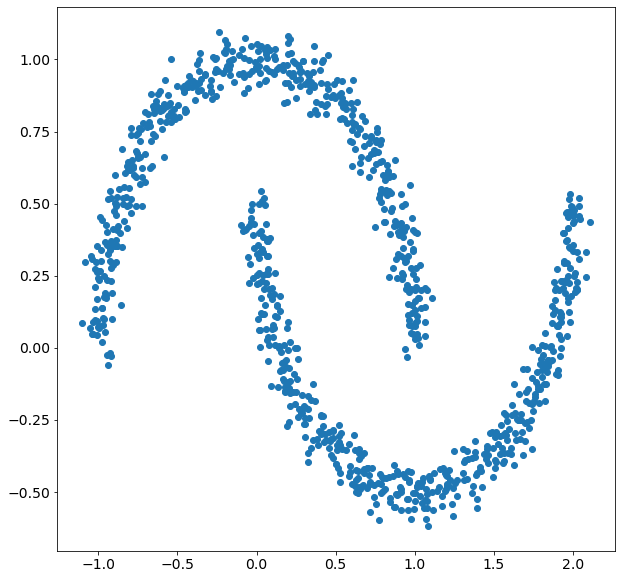

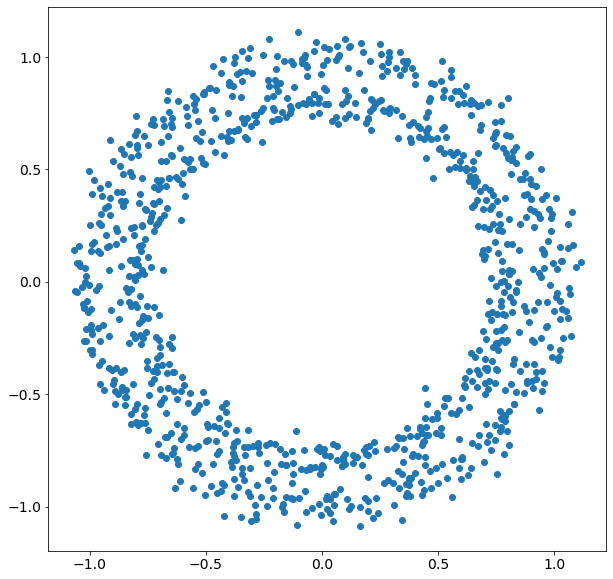

In [66]:
# Plotting the dataset 'make_moons'
plt.figure()
plt.scatter(moons_training_dataset[:,0], moons_training_dataset[:,1])
plt.show()

# Plotting the second dataset (which is definitely harder)
plt.figure()
plt.scatter(circles_training_dataset[:,0], circles_training_dataset[:,1])
plt.show()

Defining a function for retrieving the dataset (including a dataloader) as per the type of dataset

In [67]:
def create_dataloader(dset_type="moons", batch_size=64):
    """ Based on the type of dataset, choose / select the moons or circles dataset
        and return the dataloader object
    ----
    Args:

    - dset_type: string that indicates whether the "moons" or "circles" dataset is chosen
    - batch_size: batch size for the training data loader 

    Returns:

    - train_loader: Data loader object for the training class
    - train_dataset: Full training dataset
    - test_dataset: Full test dataset

    """
    if dset_type.lower() == "moons":
        train_dataset = moons_training_dataset 
        test_dataset = moons_test_dataset

    elif dset_type.lower() == "circles":
        train_dataset = circles_training_dataset
        test_dataset = circles_test_dataset
    
    else:

        print("Dataset not found!")
        sys.exit(0)

    # Training dataset loader
    print("Batch_size:{}".format(batch_size))
    print("No.of samples:{}".format(train_dataset.shape[0]))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size) # ... # Create a dataloader for loading your training dataset
    print(train_loader)

    return train_loader, train_dataset, test_dataset


Load the desired training dataset using data loaders


In [68]:
# Arbitrarily defined batch size
batch_size = 128 

# Training dataset loader
train_loader, train_dataset, test_dataset = create_dataloader(dset_type="moons", batch_size=batch_size)

Batch_size:128
No.of samples:1000


Check some basic stuff about the data


In [61]:
# Loading a new batch of data
examples = enumerate(train_loader)
batch_id, example_data = next(examples)

# Shape of a batch of data
print(example_data.shape)

torch.Size([128, 2])


Select the device to run the model on: CPU / GPU

In [33]:
ngpu = 1 # Comment this out if you want to run on cpu and the next line just set device to "cpu"
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu>0) else "cpu")
print("Device Used:{}".format(device))

Device Used:cpu


# Implementation of the Normalizing flow model

Defining the class for weight rescaling of the scaling function in the coupling layer transformation

In [34]:
class WN_Rescale_s(nn.Module):
    """
    This is a class used for weight normalization of the scaling function
    in the coupling layer transformation
    """
    def __init__(self, n_channels):
        super(WN_Rescale_s, self).__init__()
        self.weight = nn.Parameter(torch.ones(n_channels))

    def forward(self, x):

        scaled_x = self.weight * x
        return scaled_x

Defining the coupling layer

Tasks: In this part of the notebook, you will build a feed forward network which
is going to be the backbone behind a coupling layer. Remove parts of the code having `None` and replace with correct code using the instructions provided

In [35]:
class CouplingLayerNet(nn.Module):

    def __init__(self, config, add_batch_norm=False):
        super(CouplingLayerNet, self).__init__()
        """ 
        - config: It contains a dictionary of points used for initializing the shallow,
        feed forward networks in the coupling layer
        - add_batch_norm: This represents a flag that indicates whether batch normalization is
        to be used or not. In this example, we use one-dimensional batch normalization  
        """
        self.add_batch_norm = add_batch_norm # Batch normalization option

        # Define a shallow neural network for the scale function
        self.nets = nn.Sequential()

        input_size = config["input_dim"] # The dimension of the input layer
        hidden_sizes = config["hidden_dims"] # This is an array consisting of a set of hidden sizes
        output_size = config["output_dim"] # The dimension of the output layer, typically for flows this is same as the input size

        # Our feed forward network should have the following sizes of nn.Linear layers
        # Between each nn.Linear layer, we should have a LeakyReLU activation function
        # nets = [input_size, hidden_sizes[0], hidden_sizes[1], hidden_sizes[2], ..., hidden_size[-1], output_size]

        # Add batch norm layer
        if self.add_batch_norm == True:
            self.nets.add_module('BatchNorm_{}'.format(0+1), nn.BatchNorm1d(output_size))

        # First hidden layer
        i = 0
        self.nets.add_module('Hidden_{}'.format(i+1), nn.Linear(input_size, hidden_sizes[0], bias=True))
        self.nets.add_module('LeakyReLU_{}'.format(i+1), nn.LeakyReLU())

        # Rest of the hidden layers
        for i in range(1, len(hidden_sizes)):
            self.nets.add_module('Hidden_{}'.format(i+1), nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            self.nets.add_module('LeakyReLU_{}'.format(i+1), nn.LeakyReLU())
            
        # Final output layer
        self.nets.add_module('Hidden_{}'.format(len(hidden_sizes)+1), nn.Linear(hidden_sizes[i], output_size)) # Complete the code here by removing None, and adding nn.Linear layer with appropriate sizes
        return None
    
    def forward(self, x):
        
        self.net_st = lambda: self.nets
        out = self.net_st()(x)
        return out


Defining the RealNVP model class

Tasks: In this part of the notebook, you will build the RealNVP flow by filling in some missing parts. You will utilize the classes and functions defined earlier such as `CouplingLayerNet`. Remove parts of the code having `None` and replace with correct code using the instructions provided

In [36]:
class RealNVP(nn.Module):
    
    def __init__(self, options, init_nets = True, device='cpu', lr=1e-4):  
        """ Initialising the attributes of the class. Define a shallow neural 
        network for the scale function. You can also choose to define a single 
        network and split the outputs accordingly. Only point to remember is 
        that the last activation function is different for the scale and the 
        translation parameters.
        ----
        Args:

        - n_I: no. of input dimensions 
        - n_H: no. of hidden dimensions
        - n_O: no. of output dimensions
        - n_layers: no. of coupling layers

        """      
        super(RealNVP, self).__init__()

        # Initialize parameters
        self.device = device
        self.lr = options["Train"]["lr"]
        n_I = options["realnvp"]["input_dim"]
        n_layers = 2*options["realnvp"]["num_layers"]

        # Initialize the RealNVP network using the CouplingLayer class and 
        # WN_Rescale_s as defined earlier
        self.init_nets = init_nets     

        # Define a group of simple "cross" pattern masks. The number of these masks 
        # is equal to the number of affine coupling layers
        masks = self.get_mask(n_layers)
        self.mask = nn.Parameter(masks, requires_grad = False)

        # Define the prior for defining a standard, multivariate Gaussian distribution N(0, I)
        self.prior = self.get_Gaussian_prior(n_I)
        
        # Define the translation and scale parameters for each coupling layer
        if self.init_nets == True:
            self.st = self.init_network(config=options["realnvp"], num_coupling_layers=n_layers)
        else:
            pass   
        
        # Define required weight normalization function / module
        self.wn_rescale = torch.nn.utils.weight_norm(WN_Rescale_s(int(self.mask.size(1)/2)))

    def init_network(self, config, num_coupling_layers):
        """
        Define the translation and scale parameters for each coupling layer
        For every odd-indexed layer, we add batch normalization to the coupling
        layer except for the last coupling layer
        """
        return torch.nn.ModuleList([CouplingLayerNet(config=config, add_batch_norm=True) 
                                if (i < num_coupling_layers-1 and i % 2 == 0) else CouplingLayerNet(config=config, add_batch_norm=False) 
                                for i in range(num_coupling_layers)])
        

    def get_mask(self, n_layers):
        """
        Define a group of simple channel masks. The number of these masks 
        is equal to the number of affine coupling layers
        """
        masks = torch.from_numpy(np.array([[1, 0], [0, 1]] * int(n_layers)).astype(np.float32))
        return masks

    def get_Gaussian_prior(self, n_I):
        """
        Define the prior for defining a multivariate Gaussian distribution
        with zero mean and identity covariance matrix as a prior. Use the distributions
        package from PyTorch. The mean vector should be of size (n_I,)
        and covariance matrix of size (n_I, n_I)
        """
        return distributions.MultivariateNormal(torch.zeros(n_I), torch.eye(n_I)) # Remove the 'None' and create a distributions object for Multivariate Gaussian
        
    def _chunk(self, x, mask):
        """
        This function is used for splitting the input into two parts depending 
        on the value of the binary 'mask'
        """
        idx_id = torch.nonzero(mask).reshape(-1)
        idx_scale = (mask == 0).nonzero().reshape(-1)
        chunk_id = torch.index_select(x, dim=1,
                                      index=idx_id)
        chunk_scale = torch.index_select(x, dim=1,
                                         index=idx_scale)
        return (chunk_id, chunk_scale)

    def f(self, x):
        """ This function is used for implementing the inference function 
        f:X --> Z. 
        """
        log_det_J = torch.zeros(x.shape[0]).to(self.device)
        z = x
        for i in reversed(range(len(self.st))):
            z_ = self.mask[i] * z 
            st = self.st[i](z_)
            s, t = st.chunk(2,dim=1)
            s = self.wn_rescale(torch.tanh(s))
            s = s * (1 - self.mask[i])
            t = t * (1 - self.mask[i])
            s = s.mul(-1)
            exp_s = s.exp()
            z = z_ + (1 - self.mask[i]) * (z - t) * exp_s
            log_det_J += torch.sum(s, dim=1)

        return z, log_det_J

    def g(self, z):
        """ This function is used for implementing the generator function 
        f:X --> Z. 
        """
        x = copy.deepcopy(z)
        for i in range(len(self.st)):
            x_ = self.mask[i] * x
            st = self.st[i](x_)
            s, t = st.chunk(2,dim=1)
            s = self.wn_rescale(torch.tanh(s))
            s = s * (1 - self.mask[i])
            t = t * (1 - self.mask[i])
            exp_s = s.exp()
            x = x_ + (1 - self.mask[i]) * (x * exp_s + t)

        return x

    def log_prob(self, x):
        """ Computing the log-likelihood p(x) from p(z) using the change of variable
        formula (inference step)
        """
        z, logdet = self.f(x)
        pz = self.prior.log_prob(z.cpu()).to(self.device)
        return pz + logdet # Remove the 'None', and use the change of variable formula defined in the description here to get p(x) using pz and logdet
    
    def sample(self, batchSize):
        """ Generate samples drawn from the given batch of data from the latent
        space Z (generate samples)
        """
        z = self.prior.sample((batchSize,))
        logpx = self.prior.log_prob(z)
        print(z.shape)
        x = self.g(z.to(self.device)) # Remove the 'None', Get a sample using the generator function g() and the input z. Note both data and model need to be on the same device to work
        return x


Define some variables for initaliazing the parameters of the network and an object of the RealNVP flow class


In [37]:
# Set the options for initializing normalizing flows
options = {
    "Train":{ # This dictionary represents the training-related parameters
        "lr":1e-4,
        "num_epochs":1000
    },
    
    "realnvp":{ # This dictionary represents the realnvp-related parameters
        "in_channels":1,
        "input_dim":2,
        "hidden_dims":[64, 64],
        "output_dim":2,
        "num_layers":4
    }
}

Creating an instance of the model

In [14]:
flow = RealNVP(options, init_nets=True, device=device).to(device)

In [15]:
flow.log_prob(torch.randn(100, 2)).mean()

tensor(-2.8523, grad_fn=<MeanBackward0>)

Function to count the number of paramters in the model


In [16]:
# Optional: You can print the variable 'flow' to check your constructed network
print(flow)

RealNVP(
  (st): ModuleList(
    (0): CouplingLayerNet(
      (nets): Sequential(
        (BatchNorm_1): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (Hidden_1): Linear(in_features=2, out_features=64, bias=True)
        (LeakyReLU_1): LeakyReLU(negative_slope=0.01)
        (Hidden_2): Linear(in_features=64, out_features=64, bias=True)
        (LeakyReLU_2): LeakyReLU(negative_slope=0.01)
        (Hidden_3): Linear(in_features=64, out_features=2, bias=True)
      )
    )
    (1): CouplingLayerNet(
      (nets): Sequential(
        (Hidden_1): Linear(in_features=2, out_features=64, bias=True)
        (LeakyReLU_1): LeakyReLU(negative_slope=0.01)
        (Hidden_2): Linear(in_features=64, out_features=64, bias=True)
        (LeakyReLU_2): LeakyReLU(negative_slope=0.01)
        (Hidden_3): Linear(in_features=64, out_features=2, bias=True)
      )
    )
    (2): CouplingLayerNet(
      (nets): Sequential(
        (BatchNorm_1): BatchNorm1d(2, eps=1e

In [17]:
def count_params(model):
    """
    Counts two types of parameters:

    - Total no. of parameters in the model (including trainable parameters)
    - Number of trainable parameters (i.e. parameters whose gradients will be computed)

    """
    total_num_params = sum(p.numel() for p in model.parameters())
    total_num_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad == True)
    return total_num_params, total_num_trainable_params

# Count the number of parameters in the created model
total_num_params, total_num_trainable_params = count_params(flow) 

# Check the number of trainable parameters
print("The total number of trainable parameters: {}".format(total_num_trainable_params)) 

# Check the number of total parameters
print("The total number of parameters (including trainable + non-trainable): {}".format(total_num_params)) 

The total number of trainable parameters: 35874
The total number of parameters (including trainable + non-trainable): 35906


## Building the training loop

Define the optimizer for the training

In our case, we use `torch.optim.Adam`


In [18]:
optimizer = torch.optim.Adam([p for p in flow.parameters() if p.requires_grad==True], 
                             lr=options["Train"]["lr"])

Training process begins here...

Task: Complete parts of the training loop using the instructions provided


In [19]:
# Time_points to take snapshot of images
# Choose time instants like these accordingly 
n_checkpts = 100 # Number of checkpoints
snap_instants = list(1 + np.linspace(0, options["Train"]["num_epochs"], n_checkpts).astype(np.int16)) 

# Training Process begins here
losses = [] # To store the losses
z_list = [] # To store the intermediate outputs during training

flow.train(True)
for epoch in range(options["Train"]["num_epochs"]):    
    
    total_loss = 0 # Total los at the end of each epoch is reset
    for i, data in enumerate(train_loader, 0):
        
        # Setting all initial gradients to zero
        optimizer.zero_grad() # ... Insert code here 
        
        X = data.to(device) # Input data

        # Computing the Mean of the negative log-likhelihood loss, which is to be minimized 
        # Hint: You can get the positive log-likelihood loss directly using one of the member functions of RealNVP class
        # (NOTE: this corresponds to maximizing mean log-likelihood)
        
        loss = -flow.log_prob(X).mean() # Replace None and insert code here
        
        total_loss += loss # For display purpose
        
        # Computing the gradients of the flow
        loss.backward() # ... Insert code here 
      
        # Update the parameters of the flow 
        optimizer.step() # ... Insert code here
    
        losses.append(loss.item())
        
    # Display training progress as training goes on
    if (epoch + 1) % 50 == 0 or epoch == 0:
        print("Epoch:{}/{}, Batch_no.: {}, NLL loss = {:.3f}".format(epoch+1, 
                                                                     options["Train"]["num_epochs"], 
                                                                     i+1, 
                                                                     total_loss / len(train_loader)))
    
    # Display 
    if epoch + 1 in snap_instants:
        with torch.no_grad():
            # Convert this tensor to cpu() first and then convert to numpy
            # (in case GPU is not used then use z_intermediate = flow.f(X)[0].numpy())
            z_intermediate = flow.f(X)[0].cpu().numpy()
            z_list.append(z_intermediate)



Epoch:1/1000, Batch_no.: 8, NLL loss = 2.507
Epoch:50/1000, Batch_no.: 8, NLL loss = 1.224
Epoch:100/1000, Batch_no.: 8, NLL loss = 0.932
Epoch:150/1000, Batch_no.: 8, NLL loss = 0.815
Epoch:200/1000, Batch_no.: 8, NLL loss = 0.734
Epoch:250/1000, Batch_no.: 8, NLL loss = 0.674
Epoch:300/1000, Batch_no.: 8, NLL loss = 0.629
Epoch:350/1000, Batch_no.: 8, NLL loss = 0.578
Epoch:400/1000, Batch_no.: 8, NLL loss = 0.540
Epoch:450/1000, Batch_no.: 8, NLL loss = 0.506
Epoch:500/1000, Batch_no.: 8, NLL loss = 0.481
Epoch:550/1000, Batch_no.: 8, NLL loss = 0.465
Epoch:600/1000, Batch_no.: 8, NLL loss = 0.450
Epoch:650/1000, Batch_no.: 8, NLL loss = 0.438
Epoch:700/1000, Batch_no.: 8, NLL loss = 0.427
Epoch:750/1000, Batch_no.: 8, NLL loss = 0.419
Epoch:800/1000, Batch_no.: 8, NLL loss = 0.412
Epoch:850/1000, Batch_no.: 8, NLL loss = 0.404
Epoch:900/1000, Batch_no.: 8, NLL loss = 0.400
Epoch:950/1000, Batch_no.: 8, NLL loss = 0.391
Epoch:1000/1000, Batch_no.: 8, NLL loss = 0.385


Plotting the losses versus number of training iterations

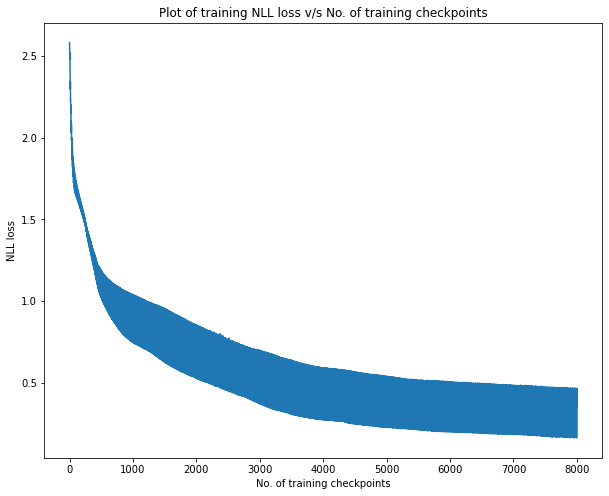

In [20]:
# Plot a figure for losses
rcParams['figure.figsize'] = 10, 8
plt.figure()         
plt.plot(losses)
plt.xlabel("No. of training checkpoints")
plt.ylabel("NLL loss")
plt.title("Plot of training NLL loss v/s No. of training checkpoints")
plt.show()

Display a progression of images as an animation

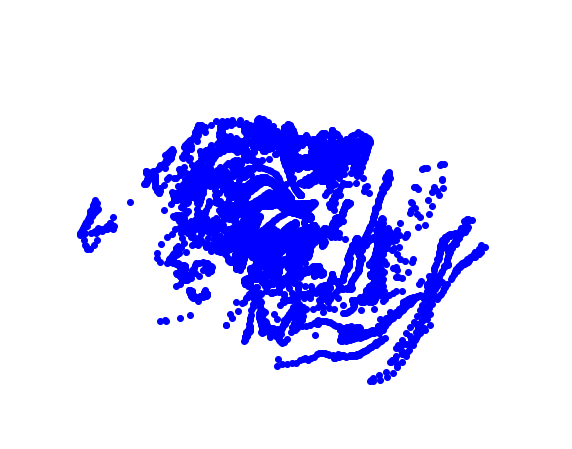

In [21]:
#%%capture
fig = plt.figure()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.axis("off")
ims = [[plt.scatter(z_intermediate[:,0], z_intermediate[:,1], c='b', animated=True)] for z_intermediate in z_list]

In [22]:
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=500, blit=True)
HTML(ani.to_jshtml())

## Examining the inference and generating function

torch.Size([400, 2])


Text(0.5, 1.0, 'X = g(z)')

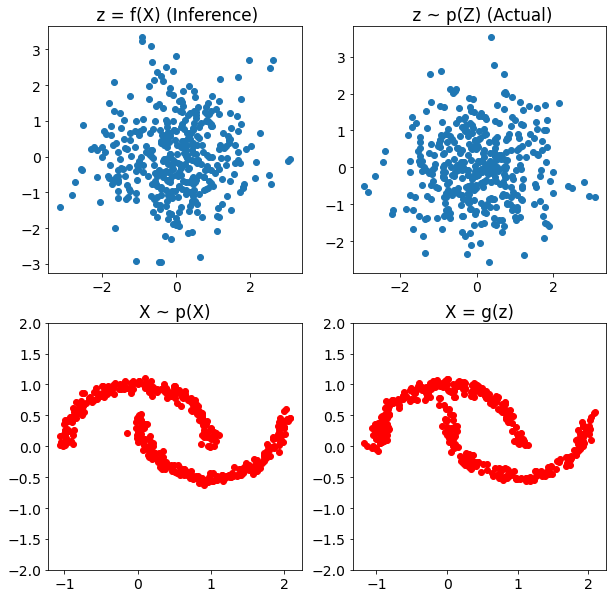

In [69]:
flow.train(False)
rcParams['figure.figsize'] = 10, 10
plt.rcParams.update({'font.size': 14})
z1 = flow.f(torch.from_numpy(test_dataset).to(device))[0].detach().cpu().numpy()
plt.subplot(221)
plt.scatter(z1[:,0], z1[:,1])
plt.title(' z = f(X) (Inference)')

z2 = np.random.multivariate_normal(np.zeros((2)), np.eye(2), n_test_samples)
plt.subplot(222)
plt.scatter(z2[:,0], z2[:,1])
plt.title(' z ~ p(Z) (Actual)')

plt.subplot(223)
x1 = test_dataset
plt.ylim(-2, 2)
plt.scatter(x1[:, 0], x1[:, 1], c='r')
plt.title('X ~ p(X)')

plt.subplot(224)
x2 = flow.sample(n_test_samples).detach().cpu().numpy()
plt.ylim(-2, 2)
plt.scatter(x2[:, 0], x2[:, 1], c='r')
plt.title('X = g(z)')